In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers
import numpy as np

## Построение модели Sequential

In [7]:
model = Sequential([
  layers.InputLayer(shape=(50,)),
  layers.Dense(100, 'relu'),
  layers.Dense(100, 'relu'),
  layers.Dense(10, 'softmax')
])

In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,210 (63.32 KB)

 Trainable params: 16,210 (63.32 KB)

 Non-trainable params: 0 (0.00 B)

## Построение модели в функциональном стиле
Построение модели через конструктор класса Model — более общий способ, позволяющий строить разветвлённые графы вычислений.

In [5]:
input = keras.Input(shape=(50,))
output1 = layers.Dense(100, 'relu')(input)
output2 = layers.Dense(100, 'relu')(output1)
output3 = layers.Dense(10, 'softmax')(output2)
model = Model(inputs=input, outputs=output3)

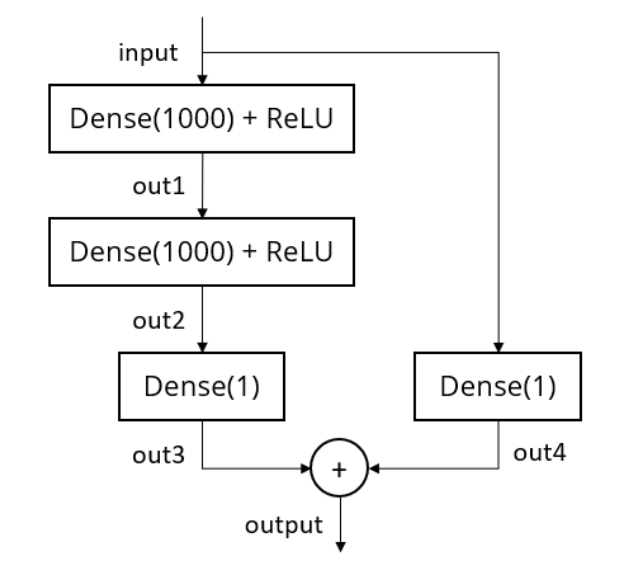

In [ ]:
input = keras.Input(shape=(50,))
out1 = layers.Dense(1000, 'relu')(input)
out2 = layers.Dense(1000, 'relu')(out1)
out3 = layers.Dense(1)(out2)
out4 = layers.Dense(1)(input)
output = out3 + out4 # tf.math.add(out3, out4) или layers.Add()([out3, out4])
model = Model(inputs=input, outputs=output)

## Построение модели в комбинированном стиле

In [ ]:
input = keras.Input(shape=(50,))
branch1 = Sequential([
  layers.Dense(1000, 'relu'),
  layers.Dense(1000, 'relu'),
  layers.Dense(1)
])
branch2 = layers.Dense(1)
output = branch1(input) + branch2(input)
model = Model(inputs=input, outputs=output)

## Считывание и изменение весов

In [8]:
layer = model.layers[0]
W, b = layer.get_weights()
layer.set_weights((W, np.zeros_like(b)))

In [11]:
W.shape # weight tensor

(50, 100)

In [10]:
b # bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [12]:
layer = layers.Dense(100)
print([x.shape for x in layer.get_weights()])
layer.build((20,)) #или так: layer(np.zeros((1, 20)))
print([x.shape for x in layer.get_weights()])

[]
[(20, 100), (100,)]


## Функции активации

In [ ]:
from tensorflow.keras import layers
layers.Dense(1000, activation='relu')

# layers.Dense(1000, activation=keras.activations.relu)

# layers.Dense(1000),
# layers.Activation('relu')

# model = Sequential([
#   layers.Dense(100),
#   layers.ReLU(),
#   layers.Dense(10),
#   layers.Softmax()
# ])

In [ ]:
# собственная функция активации
my_activation = lambda x: tf.math.sin(x) + x
l = layers.Dense(1000, activation=my_activation)

## Lambda 

Слой Lambda принимает в качестве параметра функцию, которую нужно выполнить над входными данными. Эта функция может содержать операции TensorFlow (такие как tf.nn.relu, tf.math.sin, tf.math.maximum и многие другие) и арифметические операции. 

In [ ]:
layers.Lambda(lambda x: x/255)

## Заморозка весов слоя

У слоёв и моделей есть атрибут `.trainable`, который говорит о том, будут ли веса данного слоя обучаться или будут заморожены. Если веса слоя заморожены, то оптимизатор не будет обновлять эти веса в ходе обучения. Заморозка весов может пригодиться, если мы используем уже обученную модель, дообучая только отдельные её слои.

In [13]:
model = Sequential([
  layers.Dense(100, 'relu'),
  layers.Dense(10),
])
 
assert model.layers[0].trainable == True
model.trainable = False
assert model.layers[0].trainable == False

## Компиляция модели

In [ ]:
model = Sequential([
  layers.InputLayer((100,)),
  layers.Dense(500, 'relu'),
  layers.Dense(10, 'softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

(60000, 784) float64
(10000, 784) float64
(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


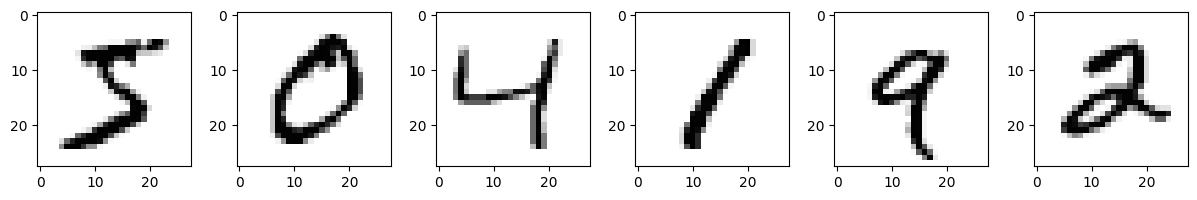

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers
from keras.metrics import Accuracy 
 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255
 
print(X_train.shape, X_train.dtype) #(60000, 784) float64
print(X_test.shape, X_test.dtype) #(10000, 784) float64
 
print(y_train.shape, y_train[:10]) #(60000,) [5 0 4 1 9 2 1 3 1 4]
print(y_test.shape, y_test[:10]) #(10000,) [7 2 1 0 4 1 4 9 5 9]
 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
  ax.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

In [28]:
model = Sequential([
  layers.InputLayer((784,)),
  layers.Dense(500, 'relu'),
  layers.Dense(500, 'relu'),
  layers.Dense(10)
])

In [31]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,944,032 (7.42 MB)

 Trainable params: 648,010 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,296,022 (4.94 MB)

In [34]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)
 
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=1024
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8226 - loss: 0.7166 - val_accuracy: 0.9440 - val_loss: 0.1910
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9499 - loss: 0.1729 - val_accuracy: 0.9609 - val_loss: 0.1323
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9670 - loss: 0.1106 - val_accuracy: 0.9676 - val_loss: 0.1023
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9772 - loss: 0.0775 - val_accuracy: 0.9733 - val_loss: 0.0860
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9831 - loss: 0.0589 - val_accuracy: 0.9784 - val_loss: 0.0720
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9880 - loss: 0.0435 - val_accuracy: 0.9761 - val_loss: 0.0735
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9904 - loss: 0.0343 - val_accuracy: 0.9796 - val_loss: 0.0655
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9935 - loss: 0.0251 - val_accuracy: 0.9787 - v

 Параметр `callbacks` в методе `fit()` означает задание неких действий, которые будут выполнены после каждой эпохи или шага обучения.

In [ ]:
from tensorflow.keras.callbacks import *
ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                verbose=1, mode='max', save_best_only=True)

## Визуализация обучения модели

In [36]:
#устанавливаем точность для метода IPython.display.display
%precision %.3f
display(model.history.history)

{'accuracy': [0.891,
  0.954,
  0.969,
  0.978,
  0.983,
  0.988,
  0.991,
  0.993,
  0.994,
  0.996],
 'loss': [0.411,
  0.158,
  0.105,
  0.075,
  0.058,
  0.043,
  0.034,
  0.026,
  0.021,
  0.016],
 'val_accuracy': [0.944,
  0.961,
  0.968,
  0.973,
  0.978,
  0.976,
  0.980,
  0.979,
  0.981,
  0.980],
 'val_loss': [0.191,
  0.132,
  0.102,
  0.086,
  0.072,
  0.074,
  0.065,
  0.070,
  0.063,
  0.066]}

In [40]:
! pip install tensorboard


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


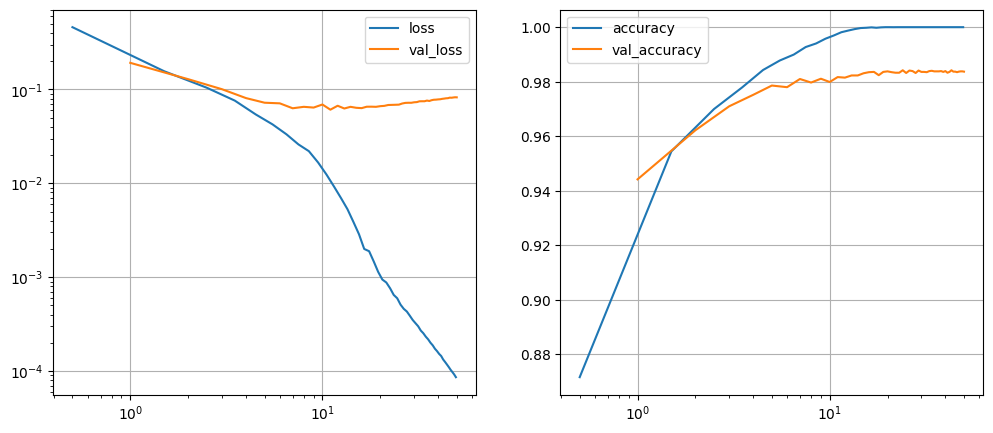

In [39]:
from IPython.display import clear_output
 
model = Sequential([
  layers.InputLayer((28*28,)),
  layers.Dense(500, 'relu'),
  layers.Dense(500, 'relu'),
  layers.Dense(10)
])
 
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)
 
def visualize(history):
  clear_output(wait=True)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  epochs = len(history.history['loss'])
  # на первом графике рисуем loss
  ax1.plot(np.arange(epochs) + 0.5, history.history['loss'], label='loss')
  ax1.plot(np.arange(epochs) + 1, history.history['val_loss'], label='val_loss')
  ax1.set_xscale('log')
  ax1.set_yscale('log')
  ax1.legend()
  ax1.grid()
  # на втором графике рисуем accuracy
  ax2.plot(np.arange(epochs) + 0.5, history.history['accuracy'], label='accuracy')
  ax2.plot(np.arange(epochs) + 1, history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xscale('log')
  ax2.legend()
  ax2.grid()
  plt.show()
 
model.history = keras.callbacks.History()
for epoch in range(50):
  model.fit(X_train, y_train, epochs=1, batch_size=1024,
            validation_data=(X_test, y_test), callbacks=[model.history])
  visualize(model.history)

## Кастомные модели

In [41]:
class CustomModel(Model):
  def __init__(self):
    super(CustomModel, self).__init__()
    self.hidden_layers = [layers.Dense(784, 'relu') for _ in range(2)]
    self.head = layers.Dense(10, 'softmax')
  def call(self, input, training=None, order=None):
    output = input
    order = order or np.random.choice(range(2), 2, replace=False)
    for layer_idx in order:
      output = self.hidden_layers[layer_idx](output)
    return self.head(output)

In [43]:
model = CustomModel()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'],
              run_eagerly=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=1024)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.6770 - loss: 1.0413 - val_accuracy: 0.9223 - val_loss: 0.2699
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9264 - loss: 0.2513 - val_accuracy: 0.9492 - val_loss: 0.1703
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9455 - loss: 0.1835 - val_accuracy: 0.9585 - val_loss: 0.1399
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9626 - loss: 0.1298 - val_accuracy: 0.9663 - val_loss: 0.1082
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9724 - loss: 0.0979 - val_accuracy: 0.9694 - val_loss: 0.1014
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9761 - loss: 0.0830 - val_accuracy: 0.9675 - val_loss: 0.1020
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.9789 - loss: 0.0743 - val_accuracy: 0.9729 - val_loss: 0.0852
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9805 - loss: 0.0656 - val_accuracy: 0

In [44]:
from keras.metrics import sparse_categorical_accuracy
preds1 = model(X_test, order=[0, 1]).numpy()
preds2 = model(X_test, order=[1, 0]).numpy()
assert not np.array_equal(preds1, preds2)
print(np.mean(sparse_categorical_accuracy(y_test, preds1)))
print(np.mean(sparse_categorical_accuracy(y_test, preds2)))
print(np.mean(sparse_categorical_accuracy(y_test, preds1 + preds2)))

0.9829
0.9816
0.9848


In [50]:
class CustomSequential(Sequential):
  def train_step(self, data):
    x, y = data
    with tf.GradientTape() as tape:
        y_pred = self(x, training=True)
        loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
    trainable_vars = self.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)
    self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    self.compiled_metrics.update_state(y, y_pred)
    return {m.name: m.result() for m in self.metrics}
 
model = CustomSequential([
  layers.InputLayer((28*28,)),
  layers.Dense(784, 'relu'),
  layers.Dense(784, 'relu'),
  layers.Dense(10, 'softmax')
])
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=1024)

Epoch 1/20


c:\Users\smart\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend\tensorflow\trainer.py:603: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight)`.
  warnings.warn(
c:\Users\smart\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend\tensorflow\trainer.py:578: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7871 - loss: 0.1000 - val_accuracy: 0.9497 - val_loss: 0.1690
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9576 - loss: 0.1000 - val_accuracy: 0.9692 - val_loss: 0.1072
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9728 - loss: 0.1000 - val_accuracy: 0.9743 - val_loss: 0.0821
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9813 - loss: 0.1000 - val_accuracy: 0.9757 - val_loss: 0.0735
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9881 - loss: 0.1000 - val_accuracy: 0.9791 - val_loss: 0.0647
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9914 - loss: 0.1000 - val_accuracy: 0.9792 - val_loss: 0.0627
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9943 - loss: 0.1000 - val_accuracy: 0.9803 - val_loss: 0.0617
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9968 - loss: 0.1000 - val_accuracy: 0.9819 - val_loss: 0.

## Работа с данными

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    #rescale=1/255,
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
)
 
train_generator = train_datagen.flow_from_directory(
    'data/beans_dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

Found 1034 images belonging to 3 classes.


In [17]:
print(len(train_generator), train_generator.n)
print(train_generator.class_indices)

33 1034
{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}


Итератор возвращает пару из исходных и целевых данных: 32 изображения размером 128x128 с тремя цветовыми каналами (RGB) и метки классов в one-hot-кодировании:

In [18]:
X, y = next(train_generator)
print(X.shape, y.shape)

(32, 128, 128, 3) (32, 3)


In [19]:
print(train_generator.batch_index) #1
train_generator.reset()
print(train_generator.batch_index) #0

1
0


In [21]:
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.applications import EfficientNetB0
 
model = Sequential([
  EfficientNetB0(input_shape=(128, 128, 3), include_top=False),
  layers.GlobalMaxPool2D(),
  layers.Dropout(0.5),
  layers.Dense(3)
])
model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=5)

Epoch 1/5


c:\Users\smart\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.4772 - loss: 2.9404
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


c:\Users\smart\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.8130 - loss: 0.8399
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.8913 - loss: 0.4544


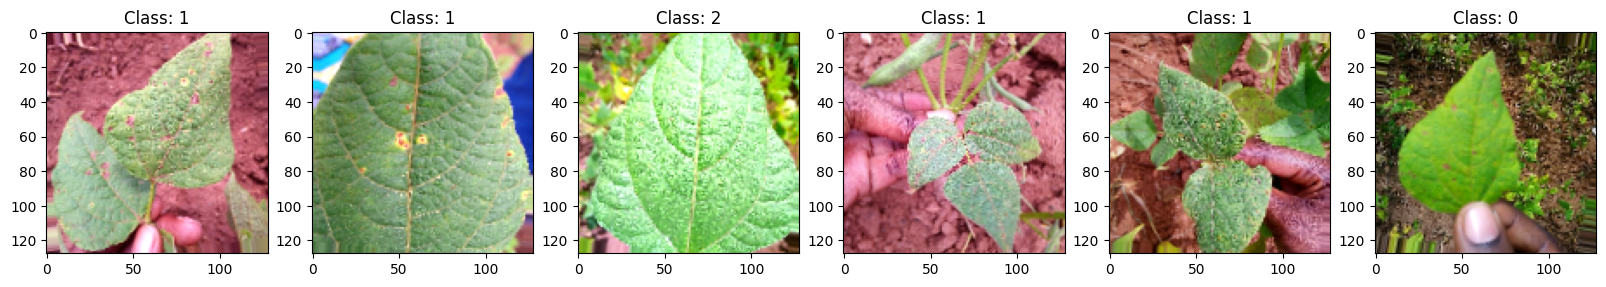

In [20]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
 
def show_first_images(generator, count=6, labels=True, figsize=(20, 5), normalized=False):
  fig, axes = plt.subplots(nrows=1, ncols=count, figsize=figsize)
  for batch, ax in zip(generator, axes.flat):
    if labels:
      img_batch, labels_batch = batch
      img, label = img_batch[0], np.argmax(labels_batch[0]) #берем по одному изображению из каждого батча
    else:
      img_batch = batch
      img = img_batch[0]
    if not normalized:
      img = img.astype(np.uint8)
    ax.imshow(img)
    # метод imshow принимает одно из двух:
    # — изображение в формате uint8, яркость от 0 до 255
    # — изображение в формате float, яркость от 0 до 1
    if labels:
      ax.set_title(f'Class: {label}')
  plt.show()
 
show_first_images(train_generator)

Found 5 images belonging to 1 classes.


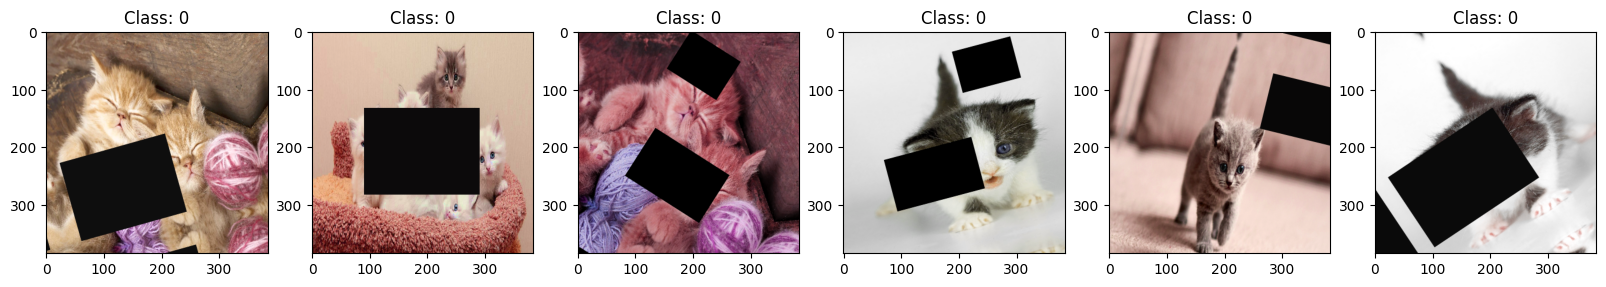

Found 5 images belonging to 1 classes.


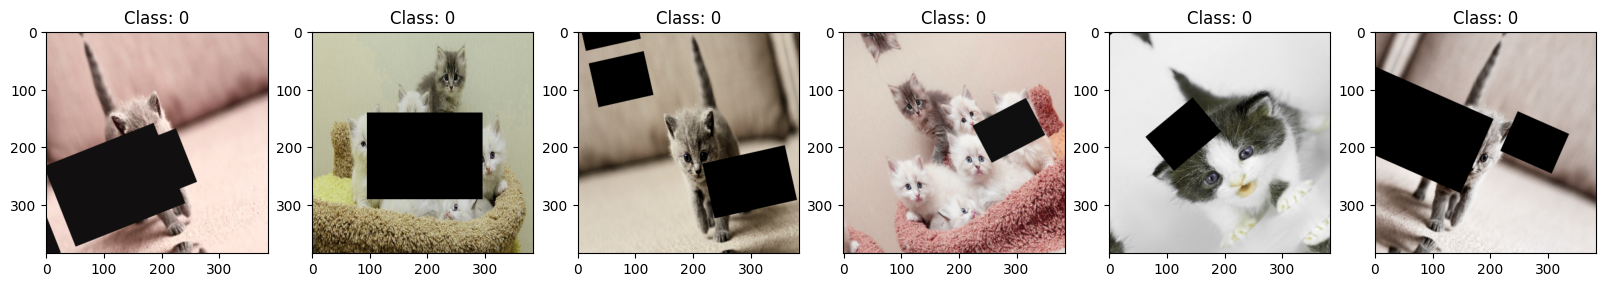

Found 5 images belonging to 1 classes.


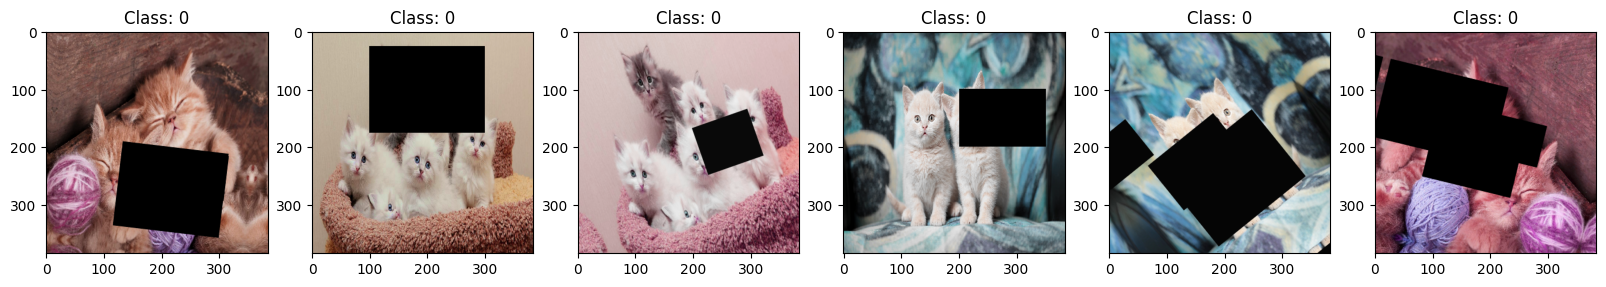

In [15]:
import albumentations as A
 
def augment(image):
  image = image.astype(np.uint8)
  aug = A.Compose([
      A.CoarseDropout(p=0.5, max_holes=1, max_height=150, max_width=200),
      A.CoarseDropout(p=0.5, max_holes=1, max_height=100, max_width=150), #второй раз
      A.CoarseDropout(p=0.5, max_holes=1, max_height=80, max_width=100), #третий раз
      A.HorizontalFlip(p=0.5),
      A.ShiftScaleRotate(p=0.7),
      A.HueSaturationValue(p=1),
      # https://albumentations.ai/docs/api_reference/augmentations/transforms/
      # https://albumentations.ai/docs/examples/example/
  ])
  return aug(image=image)['image']
 
my_datagen = ImageDataGenerator(
    preprocessing_function=augment
)
 
for _ in range(3):
  my_generator = my_datagen.flow_from_directory(
      'data/data_cats',
      target_size=(384, 384),
      batch_size=4,
      shuffle=True
  )
  show_first_images(my_generator)